<a href="https://colab.research.google.com/github/AgaWoj/financial_data/blob/main/DaneGieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.__version__

'1.23.5'

In [3]:
pd.__version__

'1.5.3'

In [3]:
def fetch_financial_data(company='RNL.DE'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-26,34.10,34.46,34.10,34.36,142.0
2024-01-25,34.50,34.50,33.97,34.21,891.0
2024-01-23,34.77,35.13,34.77,35.05,323.0
2024-01-22,34.65,34.71,34.64,34.64,128.0
2024-01-19,34.30,34.38,34.17,34.25,434.0
...,...,...,...,...,...
2019-02-04,61.42,61.42,60.09,60.15,375.0
2019-02-01,61.97,62.52,60.98,61.40,1383.0
2019-01-31,62.13,62.50,61.31,61.83,422.0


In [70]:
# cena close to najważniejsza cena

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2024-01-22 to 2019-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1267 non-null   float64
 1   High    1267 non-null   float64
 2   Low     1267 non-null   float64
 3   Close   1267 non-null   float64
 4   Volume  1259 non-null   float64
dtypes: float64(5)
memory usage: 59.4 KB


In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-22,34.65,34.71,34.64,34.64,128.0
2024-01-19,34.30,34.38,34.17,34.25,434.0
2024-01-18,34.07,34.59,34.07,34.41,73.0
2024-01-17,34.01,34.01,33.44,33.76,234.0
2024-01-16,34.46,34.46,34.46,34.46,NaN


In [7]:
# 5 ostatnich wierszy
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-30,61.67,61.67,60.86,61.15,639.0
2019-01-29,60.67,61.84,60.67,61.31,752.0
2019-01-28,60.70,60.70,59.97,60.31,764.0
2019-01-25,58.89,61.39,58.89,61.16,2669.0
2019-01-24,57.22,58.42,56.83,58.31,2464.0


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]

In [10]:
df.head()

,open,high,low,close,volume
Date,,,,,
2024-01-22,34.65,34.71,34.64,34.64,128.0
2024-01-19,34.30,34.38,34.17,34.25,434.0
2024-01-18,34.07,34.59,34.07,34.41,73.0
2024-01-17,34.01,34.01,33.44,33.76,234.0
2024-01-16,34.46,34.46,34.46,34.46,NaN


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1267.0,35.359451,10.665042,15.000,28.7525,34.245,38.7050,63.69
high,1267.0,35.796294,10.652523,15.956,29.2725,34.610,39.1175,63.96
low,1267.0,34.906124,10.664167,12.802,28.4625,33.735,38.4725,62.70
close,1267.0,35.337388,10.669165,14.684,28.9475,34.265,38.8400,63.79
volume,1259.0,6908.946783,10371.201764,1.000,1005.0000,3317.000,8203.5000,101937.00


## Jak wybierać kolumny

In [12]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-01-22,34.65,34.71,34.64,34.64,128.0
2024-01-19,34.30,34.38,34.17,34.25,434.0
2024-01-18,34.07,34.59,34.07,34.41,73.0
2024-01-17,34.01,34.01,33.44,33.76,234.0
2024-01-16,34.46,34.46,34.46,34.46,NaN
2024-01-15,34.70,34.70,34.45,34.65,198.0
2024-01-12,35.50,35.50,34.50,34.51,371.0
2024-01-11,36.23,36.44,35.62,35.62,655.0
2024-01-10,36.07,36.13,35.87,35.89,301.0


In [13]:
df['close']

Date
2024-01-22    34.64
2024-01-19    34.25
2024-01-18    34.41
2024-01-17    33.76
2024-01-16    34.46
2024-01-15    34.65
2024-01-12    34.51
2024-01-11    35.62
2024-01-10    35.89
2024-01-09    36.14
Name: close, dtype: float64

In [14]:
df.close

Date
2024-01-22    34.64
2024-01-19    34.25
2024-01-18    34.41
2024-01-17    33.76
2024-01-16    34.46
2024-01-15    34.65
2024-01-12    34.51
2024-01-11    35.62
2024-01-10    35.89
2024-01-09    36.14
Name: close, dtype: float64

In [15]:
# wycięcie jako DataFrame [[]]

df[['close', 'open']]

,close,open
Date,,
2024-01-22,34.64,34.65
2024-01-19,34.25,34.30
2024-01-18,34.41,34.07
2024-01-17,33.76,34.01
2024-01-16,34.46,34.46
2024-01-15,34.65,34.70
2024-01-12,34.51,35.50
2024-01-11,35.62,36.23
2024-01-10,35.89,36.07


In [16]:
# wycinanie kolumn dzięki iloc
# iloc przyjmuje indexy
# [:, 0] => chcę dostać wszystkie index-y i pierwszą kolumnę, pierwsza to 0

df.iloc[:,0]

Date
2024-01-22    34.65
2024-01-19    34.30
2024-01-18    34.07
2024-01-17    34.01
2024-01-16    34.46
2024-01-15    34.70
2024-01-12    35.50
2024-01-11    36.23
2024-01-10    36.07
2024-01-09    36.15
Name: open, dtype: float64

In [17]:
# jak chcę dwie kolumny - open (0) i close (3)

df.iloc[:, [0,3]]

,open,close
Date,,
2024-01-22,34.65,34.64
2024-01-19,34.30,34.25
2024-01-18,34.07,34.41
2024-01-17,34.01,33.76
2024-01-16,34.46,34.46
2024-01-15,34.70,34.65
2024-01-12,35.50,34.51
2024-01-11,36.23,35.62
2024-01-10,36.07,35.89


In [18]:
# index od 3 do 5, dostanę 3 i 4 bo piąty nie wchodzi

df.iloc[:, 3:5]

,close,volume
Date,,
2024-01-22,34.64,128.0
2024-01-19,34.25,434.0
2024-01-18,34.41,73.0
2024-01-17,33.76,234.0
2024-01-16,34.46,NaN
2024-01-15,34.65,198.0
2024-01-12,34.51,371.0
2024-01-11,35.62,655.0
2024-01-10,35.89,301.0


In [19]:
# ostatnia kolumna -1

df.iloc[:, [-1]]

# wycięte jako DataFrame

,volume
Date,
2024-01-22,128.0
2024-01-19,434.0
2024-01-18,73.0
2024-01-17,234.0
2024-01-16,NaN
2024-01-15,198.0
2024-01-12,371.0
2024-01-11,655.0
2024-01-10,301.0


In [20]:
# wycięte jako Series

df.iloc[:, -1]

Date
2024-01-22    128.0
2024-01-19    434.0
2024-01-18     73.0
2024-01-17    234.0
2024-01-16      NaN
2024-01-15    198.0
2024-01-12    371.0
2024-01-11    655.0
2024-01-10    301.0
2024-01-09    406.0
Name: volume, dtype: float64

In [21]:
# trzy ostatnie kolumny

df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-01-22,34.64,34.64,128.0
2024-01-19,34.17,34.25,434.0
2024-01-18,34.07,34.41,73.0
2024-01-17,33.44,33.76,234.0
2024-01-16,34.46,34.46,NaN
2024-01-15,34.45,34.65,198.0
2024-01-12,34.50,34.51,371.0
2024-01-11,35.62,35.62,655.0
2024-01-10,35.87,35.89,301.0


## Selekcja wierszy, jak wycinać wiersze

In [22]:
# wycina pierwszy wiersz

df.iloc[0]

open       34.65
high       34.71
low        34.64
close      34.64
volume    128.00
Name: 2024-01-22 00:00:00, dtype: float64

In [23]:
# wytnij do trzeciego

df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-01-22,34.65,34.71,34.64,34.64,128.0
2024-01-19,34.30,34.38,34.17,34.25,434.0
2024-01-18,34.07,34.59,34.07,34.41,73.0


In [24]:
# loc => wycina po indexie, przekazując wartość indexu

df.loc['2024-01-19']

open       34.30
high       34.38
low        34.17
close      34.25
volume    434.00
Name: 2024-01-19 00:00:00, dtype: float64

In [25]:
# jak chcę zakres dat

df.loc['2024-01-12':'2024-01-19']

,open,high,low,close,volume
Date,,,,,
2024-01-19,34.30,34.38,34.17,34.25,434.0
2024-01-18,34.07,34.59,34.07,34.41,73.0
2024-01-17,34.01,34.01,33.44,33.76,234.0
2024-01-16,34.46,34.46,34.46,34.46,NaN
2024-01-15,34.70,34.70,34.45,34.65,198.0
2024-01-12,35.50,35.50,34.50,34.51,371.0


## Obliczanie nowych kolumn

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2024-01-26 to 2019-01-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1267 non-null   float64
 1   High    1267 non-null   float64
 2   Low     1267 non-null   float64
 3   Close   1267 non-null   float64
 4   Volume  1259 non-null   float64
dtypes: float64(5)
memory usage: 59.4 KB


In [72]:
df.describe()

,Open,High,Low,Close,Volume
count,1267.000000,1267.000000,1267.000000,1267.000000,1259.000000
mean,35.359451,35.796294,34.906124,35.337388,6908.946783
std,10.665042,10.652523,10.664167,10.669165,10371.201764
min,15.000000,15.956000,12.802000,14.684000,1.000000
25%,28.752500,29.272500,28.462500,28.947500,1005.000000
50%,34.245000,34.610000,33.735000,34.265000,3317.000000
75%,38.705000,39.117500,38.472500,38.840000,8203.500000
max,63.690000,63.960000,62.700000,63.790000,101937.000000


In [6]:
# uzupełniam brakujące dane w kolumnie 'Volume' wartością średnią

df['Volume'] = df['Volume'].fillna(df['Volume'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2024-01-26 to 2019-01-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1267 non-null   float64
 1   High    1267 non-null   float64
 2   Low     1267 non-null   float64
 3   Close   1267 non-null   float64
 4   Volume  1267 non-null   float64
dtypes: float64(5)
memory usage: 59.4 KB


In [7]:
# chcę nową kolumnę w której będzie średnia cena z open i close
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-26,34.10,34.46,34.10,34.36,142.0
2024-01-25,34.50,34.50,33.97,34.21,891.0
2024-01-23,34.77,35.13,34.77,35.05,323.0


In [8]:
df['Average'] = (df.Open + df.Close) / 2

In [9]:
df.head(3)

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-01-26,34.10,34.46,34.10,34.36,142.0,34.230
2024-01-25,34.50,34.50,33.97,34.21,891.0,34.355
2024-01-23,34.77,35.13,34.77,35.05,323.0,34.910


In [10]:
# posortuje aby dane najstarsze były na początku - sort_index
#  i policzę dzienną zmianę procentową


df = df.sort_index()
df.head()


,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-01-29,60.67,61.84,60.67,61.31,752.0,60.990
2019-01-30,61.67,61.67,60.86,61.15,639.0,61.410
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.980
2019-02-01,61.97,62.52,60.98,61.40,1383.0,61.685
2019-02-04,61.42,61.42,60.09,60.15,375.0,60.785


In [11]:
# close - jest najważniejszą ceną iwęc badam jej zmianę z sesji na sesję
# metoda shift pozwoli nam przesunąć dane o jeden wiersz

# 1 przesunięcie o jeden dzień w dół

df['Close_shift'] = df.Close.shift(1)
df.head(3)

# df[['Close']].shift(1) => zapis jako DataFrame

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-01-29,60.67,61.84,60.67,61.31,752.0,60.99,NaN
2019-01-30,61.67,61.67,60.86,61.15,639.0,61.41,61.31
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.98,61.15


In [12]:
df['Daily_change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-01-29,60.67,61.84,60.67,61.31,752.0,60.990,NaN,NaN
2019-01-30,61.67,61.67,60.86,61.15,639.0,61.410,61.31,-0.002610
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.980,61.15,0.011120
2019-02-01,61.97,62.52,60.98,61.40,1383.0,61.685,61.83,-0.006955
2019-02-04,61.42,61.42,60.09,60.15,375.0,60.785,61.40,-0.020358


In [81]:
# jak usunąć nie potrzebną kolumnę? del

# del df['Daily change']

In [13]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-01-29,60.67,61.84,60.67,61.31,752.0,60.990,NaN,NaN
2019-01-30,61.67,61.67,60.86,61.15,639.0,61.410,61.31,-0.002610
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.980,61.15,0.011120
2019-02-01,61.97,62.52,60.98,61.40,1383.0,61.685,61.83,-0.006955
2019-02-04,61.42,61.42,60.09,60.15,375.0,60.785,61.40,-0.020358


In [14]:
df.Daily_change.min()

-0.21677788369876083

In [15]:
df.Daily_change.max()

0.1747588087248324

<Axes: >

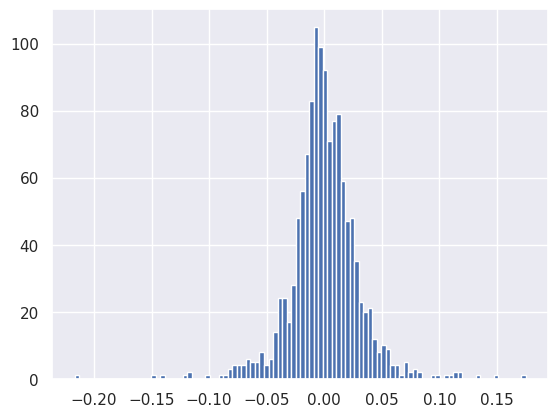

In [16]:
# bins podaje liczbę słupków które chce mieć na histogramie

import seaborn as sns
# ustaw styl
sns.set()

df.Daily_change.hist(bins=100)

<Axes: xlabel='Date'>

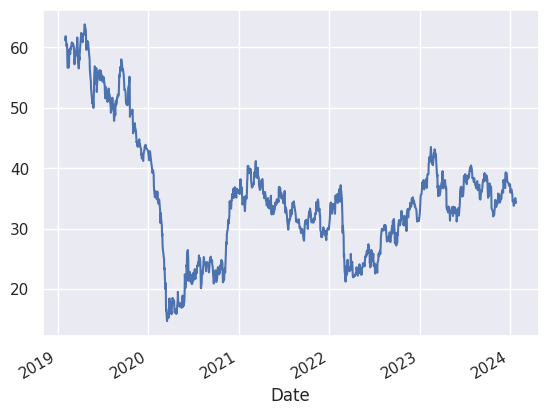

In [17]:
df.Close.plot()

## Filtrowanie danych

In [18]:
df.Daily_change > 0

Date
2019-01-29    False
2019-01-30    False
2019-01-31     True
2019-02-01    False
2019-02-04    False
              ...  
2024-01-19    False
2024-01-22     True
2024-01-23     True
2024-01-25    False
2024-01-26     True
Name: Daily_change, Length: 1267, dtype: bool

In [19]:
# jak w nawias kwadratowy oprawimy to coej to dostne wszystkie dni gdzie Daily_change było większe od 0

df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.980,61.15,0.011120
2019-02-05,60.35,60.51,60.10,60.51,70.0,60.430,60.15,0.005985
2019-02-11,57.27,57.27,56.70,56.78,835.0,57.025,56.63,0.002649
2019-02-13,57.24,57.36,56.65,56.67,4104.0,56.955,56.64,0.000530
2019-02-14,58.11,59.07,57.46,57.58,6851.0,57.845,56.67,0.016058
...,...,...,...,...,...,...,...,...
2024-01-15,34.70,34.70,34.45,34.65,198.0,34.675,34.51,0.004057
2024-01-18,34.07,34.59,34.07,34.41,73.0,34.240,33.76,0.019254
2024-01-22,34.65,34.71,34.64,34.64,128.0,34.645,34.25,0.011387


In [20]:
# średnia daodatnia stopa zwrotu

df_positive.Daily_change.mean()

0.0218950580796887

In [21]:
df_negative = df[df.Daily_change < 0]
df_negative
# więcej dni sesji jest z ujemną stopą zwrotu

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-01-30,61.67,61.67,60.86,61.15,639.000000,61.410,61.31,-0.002610
2019-02-01,61.97,62.52,60.98,61.40,1383.000000,61.685,61.83,-0.006955
2019-02-04,61.42,61.42,60.09,60.15,375.000000,60.785,61.40,-0.020358
2019-02-06,60.20,61.67,60.10,60.43,1062.000000,60.315,60.51,-0.001322
2019-02-07,60.22,60.22,57.95,57.95,983.000000,59.085,60.43,-0.041039
...,...,...,...,...,...,...,...,...
2024-01-12,35.50,35.50,34.50,34.51,371.000000,35.005,35.62,-0.031162
2024-01-16,34.46,34.46,34.46,34.46,6905.339952,34.460,34.65,-0.005483
2024-01-17,34.01,34.01,33.44,33.76,234.000000,33.885,34.46,-0.020313


In [22]:
# średnia ujemna stopa zwrotu

df_negative.Daily_change.mean()

-0.019592518751390647

In [23]:
# czy cena close był wyższa niż high
# o czym nas to informuje? że wciągu danej sesji notowania spółki zamkneły się na maximum

df.Close == df.High

Date
2019-01-29    False
2019-01-30    False
2019-01-31    False
2019-02-01    False
2019-02-04    False
              ...  
2024-01-19    False
2024-01-22    False
2024-01-23    False
2024-01-25    False
2024-01-26    False
Length: 1267, dtype: bool

In [24]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-02-05,60.35,60.51,60.10,60.51,70.000000,60.430,60.15,0.005985
2019-02-20,59.58,59.97,58.85,59.97,916.000000,59.775,58.90,0.018166
2019-02-26,60.34,60.46,59.69,60.46,618.000000,60.400,60.79,-0.005429
2019-03-15,58.72,59.58,58.62,59.58,449.000000,59.150,58.81,0.013093
2019-04-30,60.50,60.85,60.50,60.85,191.000000,60.675,61.05,-0.003276
...,...,...,...,...,...,...,...,...
2023-12-21,37.73,38.09,37.56,38.09,316.000000,37.910,38.49,-0.010392
2023-12-28,37.13,37.15,37.02,37.15,1282.000000,37.140,37.55,-0.010652
2023-12-29,37.07,37.07,37.07,37.07,6905.339952,37.070,37.15,-0.002153


In [25]:
# gdzie były równe cenie najniższej?

df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-02-07,60.22,60.22,57.95,57.95,983.000000,59.085,60.43,-0.041039
2019-03-12,59.61,60.00,58.55,58.55,3072.000000,59.080,58.73,-0.003065
2019-03-14,59.40,59.40,58.81,58.81,40.000000,59.105,58.99,-0.003051
2019-03-22,60.08,60.08,57.58,57.58,1465.000000,58.830,59.78,-0.036802
2019-04-05,62.40,62.90,62.16,62.16,780.000000,62.280,62.38,-0.003527
...,...,...,...,...,...,...,...,...
2023-12-29,37.07,37.07,37.07,37.07,6905.339952,37.070,37.15,-0.002153
2024-01-09,36.15,36.24,36.14,36.14,406.000000,36.145,36.47,-0.009049
2024-01-11,36.23,36.44,35.62,35.62,655.000000,35.925,35.89,-0.007523


# Jak wycinać konkretne sesje, konkretne notowania?

In [26]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-01-29,60.67,61.84,60.67,61.31,752.0,60.990,NaN,NaN
2019-01-30,61.67,61.67,60.86,61.15,639.0,61.410,61.31,-0.002610
2019-01-31,62.13,62.50,61.31,61.83,422.0,61.980,61.15,0.011120
2019-02-01,61.97,62.52,60.98,61.40,1383.0,61.685,61.83,-0.006955
2019-02-04,61.42,61.42,60.09,60.15,375.0,60.785,61.40,-0.020358
...,...,...,...,...,...,...,...,...
2024-01-19,34.30,34.38,34.17,34.25,434.0,34.275,34.41,-0.004650
2024-01-22,34.65,34.71,34.64,34.64,128.0,34.645,34.25,0.011387
2024-01-23,34.77,35.13,34.77,35.05,323.0,34.910,34.64,0.011836


In [27]:
# maska logiczna do wycięcia danych

df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [28]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-04,47.340,47.68,47.000,47.020,2756.0,47.1800,46.660,0.007715
2019-11-05,47.180,47.28,46.840,46.970,5504.0,47.0750,47.020,-0.001063
2019-11-06,46.970,46.97,46.000,46.140,1680.0,46.5550,46.970,-0.017671
2019-11-07,46.575,47.58,46.575,47.445,2158.0,47.0100,46.140,0.028283
2019-11-08,47.440,47.44,46.500,46.765,1634.0,47.1025,47.445,-0.014332
...,...,...,...,...,...,...,...,...
2024-01-19,34.300,34.38,34.170,34.250,434.0,34.2750,34.410,-0.004650
2024-01-22,34.650,34.71,34.640,34.640,128.0,34.6450,34.250,0.011387
2024-01-23,34.770,35.13,34.770,35.050,323.0,34.9100,34.640,0.011836


In [29]:
# od 01.11 do 15.11 - jak łączyć. warunki

df[(df.index >= '2019-11-01') & (df.index <= '2019-11-15')]

# do 15 bez 15

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,46.030,46.825,45.985,46.660,1435.0,46.3450,45.765,0.019556
2019-11-04,47.340,47.680,47.000,47.020,2756.0,47.1800,46.660,0.007715
2019-11-05,47.180,47.280,46.840,46.970,5504.0,47.0750,47.020,-0.001063
2019-11-06,46.970,46.970,46.000,46.140,1680.0,46.5550,46.970,-0.017671
2019-11-07,46.575,47.580,46.575,47.445,2158.0,47.0100,46.140,0.028283
2019-11-08,47.440,47.440,46.500,46.765,1634.0,47.1025,47.445,-0.014332
2019-11-11,46.565,46.905,46.185,46.250,3040.0,46.4075,46.765,-0.011013
2019-11-12,45.235,46.355,44.775,45.695,8968.0,45.4650,46.250,-0.012000
2019-11-13,45.605,45.605,44.865,44.960,2488.0,45.2825,45.695,-0.016085


In [30]:
# month - zwraca numer miesiąca

df.index.month

Int64Index([1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=1267)

In [31]:
df.index.month == 5

array([False, False, False, ..., False, False, False])

In [32]:
# mam dane tylko za maj

df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-02,60.540,61.600,60.540,60.890,2345.0,60.7150,60.850,0.000657
2019-05-03,60.250,60.300,60.250,60.270,227.0,60.2600,60.890,-0.010182
2019-05-06,58.250,58.890,57.880,58.890,4954.0,58.5700,60.270,-0.022897
2019-05-07,58.620,58.690,57.700,58.300,692.0,58.4600,58.890,-0.010019
2019-05-08,58.160,58.550,57.580,58.010,4367.0,58.0850,58.300,-0.004974
...,...,...,...,...,...,...,...,...
2023-05-25,32.610,32.735,32.000,32.510,374.0,32.5600,32.745,-0.007177
2023-05-26,32.510,33.225,32.395,33.225,215.0,32.8675,32.510,0.021993
2023-05-29,33.100,33.205,33.035,33.035,80.0,33.0675,33.225,-0.005719


In [33]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', name='Date', length=1267)

In [34]:
# mam dane tylko 2024

df[df.index.year == 2024]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-01-02,37.20,37.33,37.20,37.33,375.000000,37.265,37.07,0.007014
2024-01-03,37.02,37.02,36.12,36.39,564.000000,36.705,37.33,-0.025181
2024-01-04,36.35,36.42,35.91,35.93,1428.000000,36.140,36.39,-0.012641
2024-01-05,35.45,36.43,35.40,36.38,1129.000000,35.915,35.93,0.012524
2024-01-08,36.38,36.55,36.11,36.47,693.000000,36.425,36.38,0.002474
2024-01-09,36.15,36.24,36.14,36.14,406.000000,36.145,36.47,-0.009049
2024-01-10,36.07,36.13,35.87,35.89,301.000000,35.980,36.14,-0.006918
2024-01-11,36.23,36.44,35.62,35.62,655.000000,35.925,35.89,-0.007523
2024-01-12,35.50,35.50,34.50,34.51,371.000000,35.005,35.62,-0.031162


In [35]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-02-01,61.970,62.520,60.980,61.400,1383.0,61.6850,61.830,-0.006955
2019-03-01,60.540,61.130,60.540,60.650,630.0,60.5950,60.250,0.006639
2019-04-01,60.200,60.700,60.200,60.660,419.0,60.4300,58.900,0.029881
2019-07-01,55.380,55.380,54.870,54.870,468.0,55.1250,55.290,-0.007596
2019-08-01,50.490,50.510,49.900,50.290,893.0,50.3900,50.540,-0.004947
2019-10-01,53.610,53.610,52.090,52.090,583.0,52.8500,52.680,-0.011200
2019-11-01,46.030,46.825,45.985,46.660,1435.0,46.3450,45.765,0.019556
2020-04-01,17.236,17.474,16.352,16.352,3703.0,16.7940,17.776,-0.080108
2020-07-01,21.745,21.935,21.315,21.435,1480.0,21.5900,22.655,-0.053851


## Zapisanie danych

In [ ]:
df.to_csv('renault.csv')

In [39]:
# chcę zapisać dane tylko z listopad i tylko z 2019 roku

df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov.head(3)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-01,46.03,46.825,45.985,46.66,1435.0,46.345,45.765,0.019556
2019-11-04,47.34,47.680,47.000,47.02,2756.0,47.180,46.660,0.007715
2019-11-05,47.18,47.280,46.840,46.97,5504.0,47.075,47.020,-0.001063


In [40]:
# zapisanie danych

df_nov.to_csv('nov_renault2019.csv')

In [41]:
# jak wczytać dane?
# użyj metodu read_csv

df_new = pd.read_csv('nov_renault2019.csv')
df_new

,Date,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
0,2019-11-01,46.030,46.825,45.985,46.660,1435.0,46.3450,45.765,0.019556
1,2019-11-04,47.340,47.680,47.000,47.020,2756.0,47.1800,46.660,0.007715
2,2019-11-05,47.180,47.280,46.840,46.970,5504.0,47.0750,47.020,-0.001063
3,2019-11-06,46.970,46.970,46.000,46.140,1680.0,46.5550,46.970,-0.017671
4,2019-11-07,46.575,47.580,46.575,47.445,2158.0,47.0100,46.140,0.028283
5,2019-11-08,47.440,47.440,46.500,46.765,1634.0,47.1025,47.445,-0.014332
6,2019-11-11,46.565,46.905,46.185,46.250,3040.0,46.4075,46.765,-0.011013
7,2019-11-12,45.235,46.355,44.775,45.695,8968.0,45.4650,46.250,-0.012000
8,2019-11-13,45.605,45.605,44.865,44.960,2488.0,45.2825,45.695,-0.016085
9,2019-11-14,44.630,44.905,44.220,44.240,1309.0,44.4350,44.960,-0.016014


In [ ]:
df_new.to_excel('renault.xls')

In [ ]:
df_new_exel = pd.read_excel('renault.xls', index_col=0)

# index_col - sprawi, że date będzie index-em